# Recurrent Neural Network

Predicting upward and downward trends - 5 years of Google stock 2012 to 2016- to predict Jan 2017

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

The MinMaxScaler is a feature scaling technique provided by libraries like scikit-learn in Python. It transforms features by scaling them to a given range, usually between 0 and 1.

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
training_set_scaled


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

When you have sigmoid function at output network- Normalization scaling is preferred

### Creating a data structure with 60 timesteps and 1 output

In [31]:
X_train = []
y_train = []
for i in range(120, 1258):
    X_train.append(training_set_scaled[i-120:i, 0]) # 0 to 59 rows, 0 column
    y_train.append(training_set_scaled[i, 0]) #60
X_train, y_train = np.array(X_train), np.array(y_train)

In [32]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.0180445 , 0.0180817 ,
        0.00710618],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.0180817 , 0.00710618,
        0.0064923 ],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.00710618, 0.0064923 ,
        0.00225091],
       ...,
       [0.78201503, 0.79792023, 0.81851328, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.79792023, 0.81851328, 0.82688444, ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.81851328, 0.82688444, 0.82308952, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [33]:
y_train

array([0.0064923 , 0.00225091, 0.00682714, ..., 0.95725128, 0.93796041,
       0.93688146])

60 timesteps means at each time the rnn looks back 60 timesteps or 60 days back - we fix 60 based on trail and error


### Reshaping for RNN

In [34]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

This line of code is reshaping your training data (X_train) into a format suitable for an LSTM network or any other model expecting three-dimensional input. In Keras, the LSTM layer expects input to be in the form of [samples, time steps, features]:

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [36]:
regressor = Sequential()

regressor has sequence of layers

### Adding the first LSTM layer and some Dropout regularisation

In [37]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


why dropout to aviod overfitting- 20% of meuron in the layer- 20%0f 50 in LSTM is 10 neurons is dropout.
LSTM - Number of lstm cell or units,50 neurons in the 1st LSTM layer
true represents you can add more LSTM
X_train.shape[1], 1 - 60,1 predictor


### Adding a second LSTM layer and some Dropout regularisation

In [38]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [39]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [40]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [41]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [42]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

keras documentation - optimizer
This step prepares the model for training by specifying the optimizer and the loss function.

### Fitting the RNN to the Training set

In [43]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 23s 318ms/step - loss: 0.1070
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 250ms/step - loss: 0.0100
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 299ms/step - loss: 0.0063
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 308ms/step - loss: 0.0052
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 249ms/step - loss: 0.0053
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 310ms/step - loss: 0.0049
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 260ms/step - loss: 0.0051
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 272ms/step - loss: 0.0052
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 310ms/step - loss: 0.0048
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 302ms/step - loss: 0.0069
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 250ms/step - loss: 0.0039
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 303ms/step - loss: 0.0044
Epoch 13/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 260ms/step - loss: 0.0039
Epoch 14/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/step - loss: 0.0041
Epoch 15/100
36/36 ━━━━━━━━━━━━

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [44]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [45]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

we need 60 previous values for test set, but in jan 2017 only 20, so we need other values from training set Dec 2016

axis=0 data concated along vertical

##Create Test sequences

In [57]:
X_test = []
for i in range(120, 140):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)

## Reshape Test Data

In [58]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [59]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


### Visualising the results

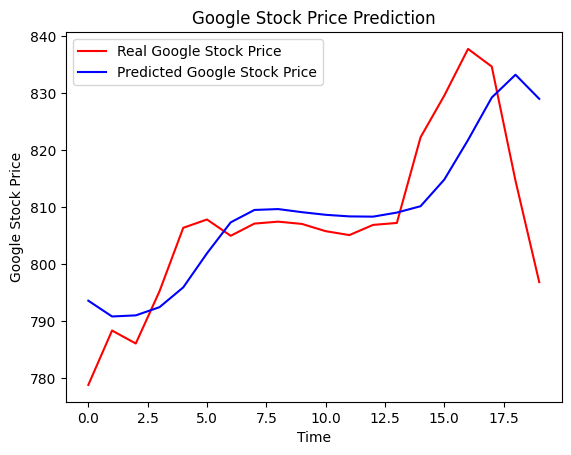

In [60]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()